In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25b44c228f317a816fcf44be4a39f83d


## Import Dependencies, and Initialize an Empty List and Counters

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | verkhnyaya inta
Processing Record 9 of Set 1 | astanajapura
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | rosarito
Processing Record 12 of Set 1 | sumkino
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | batagay-alyta
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | namibe
Processing Record 19 of Set 1 | woodward
Processing Record 20 of Set 1 | makakilo city
Processing Record 21 of Set 1 | killybegs
Processing Record 22 of 

Processing Record 38 of Set 4 | chapais
Processing Record 39 of Set 4 | contamana
Processing Record 40 of Set 4 | belur
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | malm
Processing Record 43 of Set 4 | nalut
Processing Record 44 of Set 4 | skibbereen
Processing Record 45 of Set 4 | marzuq
Processing Record 46 of Set 4 | lianran
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | vardo
Processing Record 50 of Set 4 | burnie
Processing Record 1 of Set 5 | oriximina
Processing Record 2 of Set 5 | le vauclin
Processing Record 3 of Set 5 | fort nelson
Processing Record 4 of Set 5 | ust-nera
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | borovoy
Processing Record 8 of Set 5 | stephenville
Processing Record 9 of Set 5 | darab
Processing Record 10 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 11 of Set 5 | sao joao da bar

Processing Record 31 of Set 8 | zunyi
Processing Record 32 of Set 8 | jhargram
Processing Record 33 of Set 8 | bathurst
Processing Record 34 of Set 8 | gryazovets
Processing Record 35 of Set 8 | macherla
Processing Record 36 of Set 8 | kholtoson
Processing Record 37 of Set 8 | zverinogolovskoye
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 40 of Set 8 | estelle
Processing Record 41 of Set 8 | maceio
Processing Record 42 of Set 8 | eyl
Processing Record 43 of Set 8 | dicabisagan
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | barbar
City not found. Skipping...
Processing Record 46 of Set 8 | mykolayivka
Processing Record 47 of Set 8 | wuwei
Processing Record 48 of Set 8 | harnosand
Processing Record 49 of Set 8 | duku
Processing Record 50 of Set 8 | norman wells
Processing Record 1 of Set 9 | tual
Processing Record 2 of Set 9 | praya
Processing Record 3 of Set 9 | huarmey
Proc

Processing Record 16 of Set 12 | mananjary
Processing Record 17 of Set 12 | faanui
Processing Record 18 of Set 12 | smithers
Processing Record 19 of Set 12 | leningradskiy
Processing Record 20 of Set 12 | grand forks
Processing Record 21 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 22 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 23 of Set 12 | ust-tsilma
Processing Record 24 of Set 12 | maloshuyka
City not found. Skipping...
Processing Record 25 of Set 12 | puerto el triunfo
Processing Record 26 of Set 12 | taoudenni
Processing Record 27 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 28 of Set 12 | palmares do sul
Processing Record 29 of Set 12 | jinchang
Processing Record 30 of Set 12 | vincennes
Processing Record 31 of Set 12 | bargal
City not found. Skipping...
Processing Record 32 of Set 12 | srivardhan
Processing Record 33 of Set 12 | zhanaozen
Processing Record 34 of Set 12 | kostroma
Processing Record 35

In [11]:
len(city_data)

548

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.02,73,16,14.63,PF,2021-05-29 02:18:48
1,Ushuaia,-54.8000,-68.3000,29.86,100,90,19.57,AR,2021-05-29 02:18:49
2,Mahebourg,-20.4081,57.7000,74.25,88,75,0.00,MU,2021-05-29 02:16:13
3,Tiksi,71.6872,128.8694,32.97,96,100,15.03,RU,2021-05-29 02:18:49
4,Lorengau,-2.0226,147.2712,84.33,75,99,10.02,PG,2021-05-29 02:18:49
5,Rikitea,-23.1203,-134.9692,76.78,75,77,20.51,PF,2021-05-29 02:18:50
6,Bredasdorp,-34.5322,20.0403,58.32,77,7,9.08,ZA,2021-05-29 02:18:50
7,Verkhnyaya Inta,65.9811,60.3094,47.59,63,100,10.51,RU,2021-05-29 02:18:50
8,Astanajapura,-6.8017,108.6311,84.27,70,99,4.88,ID,2021-05-29 02:18:51
9,Saint George,37.1041,-113.5841,93.67,8,1,1.01,US,2021-05-29 02:15:17


## reorder the columns

In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-05-29 02:18:48,-9.8000,-139.0333,79.02,73,16,14.63
1,Ushuaia,AR,2021-05-29 02:18:49,-54.8000,-68.3000,29.86,100,90,19.57
2,Mahebourg,MU,2021-05-29 02:16:13,-20.4081,57.7000,74.25,88,75,0.00
3,Tiksi,RU,2021-05-29 02:18:49,71.6872,128.8694,32.97,96,100,15.03
4,Lorengau,PG,2021-05-29 02:18:49,-2.0226,147.2712,84.33,75,99,10.02
5,Rikitea,PF,2021-05-29 02:18:50,-23.1203,-134.9692,76.78,75,77,20.51
6,Bredasdorp,ZA,2021-05-29 02:18:50,-34.5322,20.0403,58.32,77,7,9.08
7,Verkhnyaya Inta,RU,2021-05-29 02:18:50,65.9811,60.3094,47.59,63,100,10.51
8,Astanajapura,ID,2021-05-29 02:18:51,-6.8017,108.6311,84.27,70,99,4.88
9,Saint George,US,2021-05-29 02:15:17,37.1041,-113.5841,93.67,8,1,1.01


## export as csv

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## study this code carefully.
it contains several steps
* imports time module
* builds scatter plot using series of extracted data from the DataFrame city_data_df
* adds labels including  the current date to the title
* saves the image
* displays scatter plot

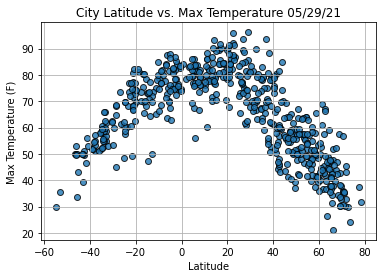

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

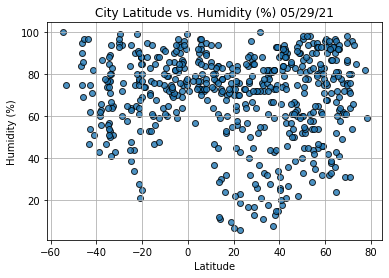

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

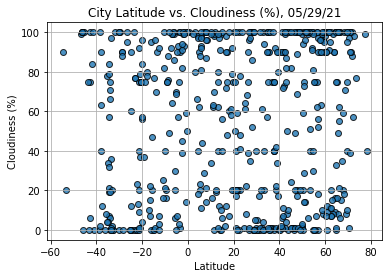

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%), "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

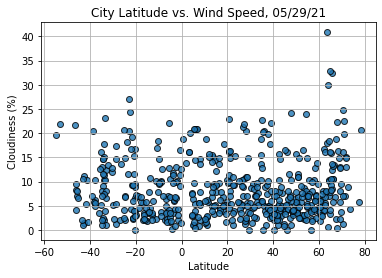

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed, "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()